# 라이브러리 불러오기

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 불러오기

In [3]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# X, y 데이터 분리

In [4]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# 훈련데이터, 테스트데이터 분리
- 스케일링 없이 진행 시 학습 과정에서 Overflow발생
- Sigmoid에 들어가는 z값 제한, log0제한 등을 하면 예측 성능 저하
- 스케일링을 해줘야 한다.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 2)
(320, 1)
(80, 2)
(80, 1)


# 모델 구성

In [51]:
# 시그모이드 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 비용함수(크로스 엔트로피)
def cost(X, y, w):
    m = len(y)
    y_pred = sigmoid(X @ w)
    return -(1/m) * (y.T @ np.log(y_pred) + (1 - y).T @ np.log(1 - y_pred))

# 경사하강법
def gd(X, y, lr=0.01, epochs=10000):
    m, n = X.shape
    w = np.zeros((n, 1))
    for _ in range(epochs):
        z = X @ w
        y_pred = sigmoid(z)
        gradient = (1/m) * X.T @ (y_pred - y)
        w -= lr * gradient
    return w

In [88]:
# 행렬 계산을 위해 X에 1을 추가(w에는 절편이 있기 때문에 크기가 안 맞음)
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# 경사하강법으로 가중치 구하기
w = gradient_descent(X_train_bias, y_train)
w0 = w[0, 0]
w1 = w[1, 0]
w2 = w[2, 0]
print(f"파라미터 : {w0, w1, w2}")
print(f"에러 : {cost(X_train_bias, y_train, w)}")

파라미터 : (-1.0278004357315047, 2.0909863632559555, 1.2055316814581016)
에러 : [[0.37284139]]


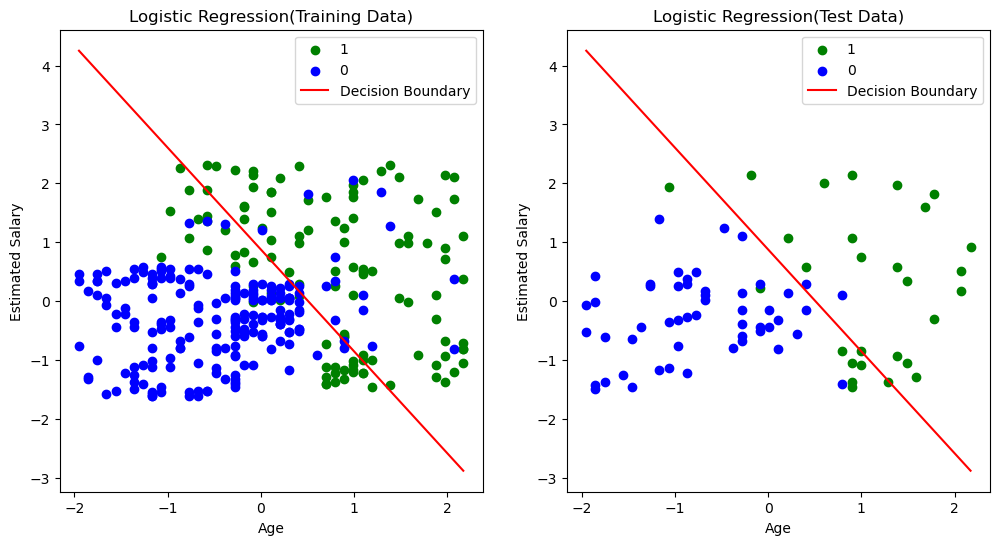

In [118]:
# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
# 일단 학습데이터를 시각화한다.
plt.scatter(X_train[y_train.flatten()==1, 0], X_train[y_train.flatten()==1, 1],
            color='green', label='1')
plt.scatter(X_train[y_train.flatten()==0, 0], X_train[y_train.flatten()==0, 1],
            color='blue', label='0')
# 위에서 구한 가중치로 분류선을 긋는다.
xp = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
yp = -(w1/w2) * xp - (w0/w2)
plt.plot(xp, yp, label='Decision Boundary', color='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression(Training Data)')
plt.legend()

# 테스트 데이터도 위와 마찬가지로 해준다.
plt.subplot(1,2,2)
plt.scatter(X_test[y_test.flatten()==1, 0], X_test[y_test.flatten()==1, 1],
            color='green', label='1')
plt.scatter(X_test[y_test.flatten()==0, 0], X_test[y_test.flatten()==0, 1],
            color='blue', label='0')

xp = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
yp = -(w1/w2) * xp - (w0/w2)
plt.plot(xp, yp, label='Decision Boundary', color='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression(Test Data)')
plt.legend()
plt.show()

# Sklearn으로 학습

In [116]:
# sklearn에 있는 로지스틱회귀 모델로 학습
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train.flatten()) # y자리는 1차원 벡터가 들어가야함.
w0 = model.intercept_[0]
w1 = model.coef_[0, 0]
w2 = model.coef_[0, 1]
print(f"파라미터 : {w0, w1, w2}")
print(f"에러 : {cost(X_test_bias, y_test, np.array([w0, w1, w2]).reshape(-1, 1))}")

파라미터 : (-0.9950647102470723, 1.9652171709619037, 1.1350827586274586)
에러 : [[0.25625795]]


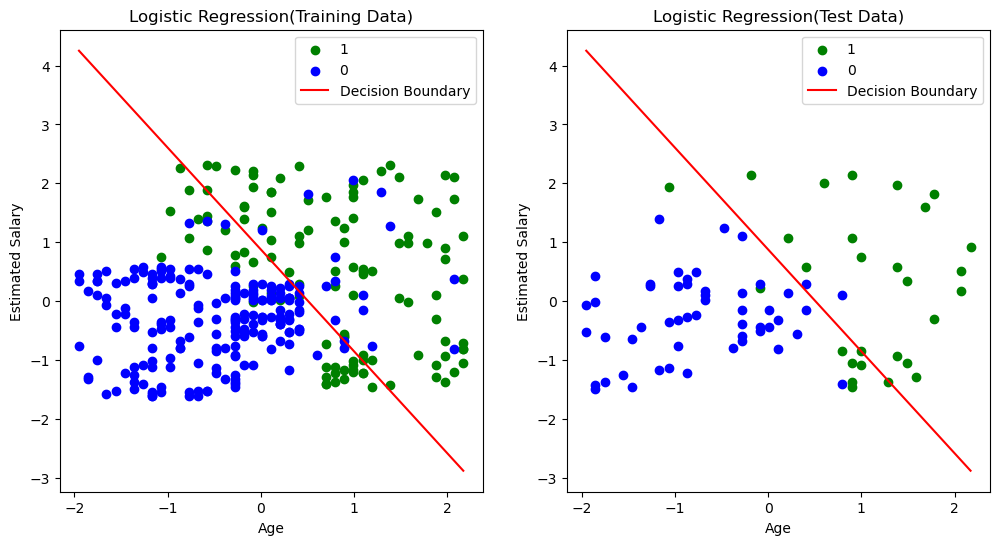

In [122]:
# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(X_train[y_train.flatten()==1, 0], X_train[y_train.flatten()==1, 1],
            color='green', label='1')
plt.scatter(X_train[y_train.flatten()==0, 0], X_train[y_train.flatten()==0, 1],
            color='blue', label='0')
xp = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
yp = -(w1/w2) * xp - (w0/w2)
plt.plot(xp, yp, label='Decision Boundary', color='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression(Training Data)')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_test[y_test.flatten()==1, 0], X_test[y_test.flatten()==1, 1],
            color='green', label='1')
plt.scatter(X_test[y_test.flatten()==0, 0], X_test[y_test.flatten()==0, 1],
            color='blue', label='0')

xp = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
yp = -(w1/w2) * xp - (w0/w2)
plt.plot(xp, yp, label='Decision Boundary', color='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression(Test Data)')
plt.legend()
plt.show()

# 정확도 평가

In [126]:
y_pred = model.predict(X_test)
print(f"정확도 : {accuracy_score(y_test, y_pred)}")

정확도 : 0.8625
